# IEEE Fraud Detection
# Full EDA - LGB & XGB - Voting - Feature Engineering and Selection

<img src="https://www.finance-monthly.com/Finance-Monthly/wp-content/uploads/2017/10/Bank-Credit-Card-Fraud-Still-the-Most-Common-Type-of-Fraud.jpg"/>

## Gather The Data

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

Do to lots of memory usage, we use this function to reduce `float32` type to some new smaller type.

In [2]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
DATASET_PATH = '../input/ieee-fraud-detection'
train_transaction = pd.read_csv(os.path.join(DATASET_PATH, 'train_transaction.csv'), index_col='TransactionID')
train_transaction = reduce_mem_usage(train_transaction)
test_transaction = pd.read_csv(os.path.join(DATASET_PATH, 'test_transaction.csv'), index_col='TransactionID')
test_transaction = reduce_mem_usage(test_transaction)
train_identity = pd.read_csv(os.path.join(DATASET_PATH,'train_identity.csv'), index_col='TransactionID')
train_identity = reduce_mem_usage(train_identity)
test_identity = pd.read_csv(os.path.join(DATASET_PATH,'test_identity.csv'), index_col='TransactionID')
test_identity = reduce_mem_usage(test_identity)
sample_submission = pd.read_csv(os.path.join(DATASET_PATH,'sample_submission.csv'), index_col='TransactionID')


Mem. usage decreased to 544.60 Mb (69.3% reduction)
Mem. usage decreased to 474.52 Mb (68.8% reduction)
Mem. usage decreased to 26.41 Mb (41.5% reduction)
Mem. usage decreased to 25.98 Mb (41.5% reduction)


In [4]:
train_set = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test_set = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

In [5]:
train_set=reduce_mem_usage(train_set)
test_set=reduce_mem_usage(test_set)

Mem. usage decreased to 668.22 Mb (0.0% reduction)
Mem. usage decreased to 583.43 Mb (0.0% reduction)


In [6]:
del train_transaction
del train_identity
del test_transaction
del test_identity

In [7]:
import gc
gc.collect()

42

# Others Feature Engineering

Here is some feature engineering. These feature engineearings gathered from all over other kernels. My own feature engineerings are bellow in descriptions.

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import preprocessing
class FeatureEng(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    X=X.copy()
    
    ## Check proton mail
    X['P_isproton']=(X['P_emaildomain']=='protonmail.com')
    X['R_isproton']=(X['R_emaildomain']=='protonmail.com')
    
    ## number of nulls
    X['nulls1'] = X.isna().sum(axis=1)
    
    ## check latest browser or not
    a = np.zeros(X.shape[0])
    X["lastest_browser"] = a
    X.loc[X["id_31"]=="samsung browser 7.0",'lastest_browser']=1
    X.loc[X["id_31"]=="opera 53.0",'lastest_browser']=1
    X.loc[X["id_31"]=="mobile safari 10.0",'lastest_browser']=1
    X.loc[X["id_31"]=="google search application 49.0",'lastest_browser']=1
    X.loc[X["id_31"]=="firefox 60.0",'lastest_browser']=1
    X.loc[X["id_31"]=="edge 17.0",'lastest_browser']=1
    X.loc[X["id_31"]=="chrome 69.0",'lastest_browser']=1
    X.loc[X["id_31"]=="chrome 67.0 for android",'lastest_browser']=1
    X.loc[X["id_31"]=="chrome 63.0 for android",'lastest_browser']=1
    X.loc[X["id_31"]=="chrome 63.0 for ios",'lastest_browser']=1
    X.loc[X["id_31"]=="chrome 64.0",'lastest_browser']=1
    X.loc[X["id_31"]=="chrome 64.0 for android",'lastest_browser']=1
    X.loc[X["id_31"]=="chrome 64.0 for ios",'lastest_browser']=1
    X.loc[X["id_31"]=="chrome 65.0",'lastest_browser']=1
    X.loc[X["id_31"]=="chrome 65.0 for android",'lastest_browser']=1
    X.loc[X["id_31"]=="chrome 65.0 for ios",'lastest_browser']=1
    X.loc[X["id_31"]=="chrome 66.0",'lastest_browser']=1
    X.loc[X["id_31"]=="chrome 66.0 for android",'lastest_browser']=1
    X.loc[X["id_31"]=="chrome 66.0 for ios",'lastest_browser']=1
    
    ## check mail suffix
    emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 'scranton.edu': 'other', 'optonline.net': 'other', 'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo', 'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com': 'microsoft', 'aim.com': 'aol', 'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink', 'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 'gmx.de': 'other', 'web.de': 'other', 'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 'protonmail.com': 'other', 'hotmail.fr': 'microsoft', 'windstream.net': 'other', 'outlook.es': 'microsoft', 'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo', 'servicios-ta.com': 'other', 'netzero.net': 'other', 'suddenlink.net': 'other', 'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft', 'verizon.net': 'yahoo', 'msn.com': 'microsoft', 'q.com': 'centurylink', 'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 'rocketmail.com': 'yahoo', 'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 'mail.com': 'other', 'bellsouth.net': 'other', 'embarqmail.com': 'centurylink', 'cableone.net': 'other', 'hotmail.es': 'microsoft', 'mac.com': 'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 'yahoo.com': 'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other', 'aol.com': 'aol', 'juno.com': 'other', 'icloud.com': 'apple'}
    us_emails = ['gmail', 'net', 'edu']
    for c in ['P_emaildomain', 'R_emaildomain']:
      X[c + '_bin'] = X[c].map(emails)
      X[c + '_suffix'] = X[c].map(lambda x: str(x).split('.')[-1])
      X[c + '_suffix'] = X[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')
    del emails, us_emails
    
    
    ### new card, addr features
    X['card1_count_full'] = X['card1'].map(pd.concat([train_set['card1'], test_set['card1']], ignore_index=True).value_counts(dropna=False))
    X['card2_count_full'] = X['card2'].map(pd.concat([train_set['card2'], test_set['card2']], ignore_index=True).value_counts(dropna=False))
    X['card3_count_full'] = X['card3'].map(pd.concat([train_set['card3'], test_set['card3']], ignore_index=True).value_counts(dropna=False))
    X['card4_count_full'] = X['card4'].map(pd.concat([train_set['card4'], test_set['card4']], ignore_index=True).value_counts(dropna=False))
    X['card5_count_full'] = X['card5'].map(pd.concat([train_set['card5'], test_set['card5']], ignore_index=True).value_counts(dropna=False))
    X['card6_count_full'] = X['card6'].map(pd.concat([train_set['card6'], test_set['card6']], ignore_index=True).value_counts(dropna=False))
    X['addr1_count_full'] = X['addr1'].map(pd.concat([train_set['addr1'], test_set['addr1']], ignore_index=True).value_counts(dropna=False))
    X['addr2_count_full'] = X['addr2'].map(pd.concat([train_set['addr2'], test_set['addr2']], ignore_index=True).value_counts(dropna=False))
    
    ###  Transaction_amt , id02, and D15
    X['TransactionAmt_to_mean_card1'] = X['TransactionAmt'] / X.groupby(['card1'])['TransactionAmt'].transform('mean')
    X['TransactionAmt_to_mean_card4'] = X['TransactionAmt'] / X.groupby(['card4'])['TransactionAmt'].transform('mean')
    X['TransactionAmt_to_std_card1'] = X['TransactionAmt'] / X.groupby(['card1'])['TransactionAmt'].transform('std')
    X['TransactionAmt_to_std_card4'] = X['TransactionAmt'] / X.groupby(['card4'])['TransactionAmt'].transform('std')
    X['id_02_to_mean_card1'] = X['id_02'] / X.groupby(['card1'])['id_02'].transform('mean')
    X['id_02_to_mean_card4'] = X['id_02'] / X.groupby(['card4'])['id_02'].transform('mean')
    X['id_02_to_std_card1'] = X['id_02'] / X.groupby(['card1'])['id_02'].transform('std')
    X['id_02_to_std_card4'] = X['id_02'] / X.groupby(['card4'])['id_02'].transform('std')
    X['D15_to_mean_card1'] = X['D15'] / X.groupby(['card1'])['D15'].transform('mean')
    X['D15_to_mean_card4'] = X['D15'] / X.groupby(['card4'])['D15'].transform('mean')
    X['D15_to_std_card1'] = X['D15'] / X.groupby(['card1'])['D15'].transform('std')
    X['D15_to_std_card4'] = X['D15'] / X.groupby(['card4'])['D15'].transform('std')
    
    ###  time of transactions
    X['Transaction_day_of_week'] = np.floor((X['TransactionDT'] / (3600 * 24) - 1) % 7)
    X['Transaction_hour_of_day'] = np.floor(X['TransactionDT'] / 3600) % 24
    X['TransactionAmt_decimal'] = ((X['TransactionAmt'] - X['TransactionAmt'].astype(int)) * 1000).astype(int)  
    
    ### some combinations
    for feature in ['id_02__id_20', 'id_02__D8', 'D11__DeviceInfo', 'DeviceInfo__P_emaildomain', 'P_emaildomain__C2', 
                    'card2__dist1', 'card1__card5', 'card2__id_20', 'card5__P_emaildomain', 'addr1__card1']:
      f1, f2 = feature.split('__')
      X[feature] = X[f1].astype(str) + '_' + X[f2].astype(str)
      le =preprocessing.LabelEncoder()
      le.fit(list(X[feature].astype(str).values))
      X[feature] = le.transform(list(X[feature].astype(str).values))
    for feature in ['id_01', 'id_31', 'id_33', 'id_35']:
    
    # Count encoded separately for train and test
      X[feature + '_count_dist'] = X[feature].map(X[feature].value_counts(dropna=False))

    category_features=["ProductCD","P_emaildomain",
                       "R_emaildomain","M1","M2","M3","M4","M5","M6","M7","M8","M9","DeviceType","DeviceInfo","id_12",
                       "id_13","id_14","id_15","id_16","id_17","id_18","id_19","id_20","id_21","id_22","id_23","id_24",
                       "id_25","id_26","id_27","id_28","id_29","id_30","id_32","id_34", 'id_36'
                       "id_37","id_38"]
    for c in category_features:
      X[feature + '_count_full'] = X[feature].map(pd.concat([train_set[feature], test_set[feature]], ignore_index=True).value_counts(dropna=False))

    del le
    return X


In [9]:
train_set = FeatureEng().transform(train_set)
test_set = FeatureEng().transform(test_set)

## Split Numbers and Labels

In [10]:
train_labels = train_set.select_dtypes([object])
train_numbers = train_set.select_dtypes([np.float64, np.float32, np.float16, np.int32, np.int16, np.int8, np.int64])
label_atrrs = train_labels.columns.values
numbers_attrs = train_numbers.columns.values

## Deleting Null Columns


In [11]:
train_numbers.info(max_cols=400)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 2987000 to 3577539
Columns: 442 entries, isFraud to id_35_count_full
dtypes: float16(362), float32(49), float64(3), int16(1), int32(1), int64(25), int8(1)
memory usage: 652.7 MB


### Percent Imputer
First we delete columns which have less than 90% of all entry numbers. 

In [12]:
from sklearn.base import TransformerMixin, BaseEstimator
class PercentImputer(TransformerMixin, BaseEstimator):
    def __init__(self, percent=0.6):
        self.percent = percent
        self.not_labels = []
    def fit(self, X, y=None):
        length = len(X)
        nulls_count = X.isnull().sum()
        labels = X.columns.values
        self.new_labels = []
        for label in labels:
            if(nulls_count[label] < self.percent * length):
                self.new_labels.append(label)
            else:
                self.not_labels.append(label)
        return self
    def transform(self, X, y=None):
        X=X.replace(np.inf,-999)
        return X[self.new_labels]

In [13]:
p_number_imputer = PercentImputer(percent=0.9)
p_labels_imputer = PercentImputer(percent=0.9)
numbers_p_imputed = p_number_imputer.fit_transform(train_numbers)
labels_p_imputed = p_labels_imputer.fit_transform(train_labels)

In [14]:
train_numbers.info()
numbers_p_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 2987000 to 3577539
Columns: 442 entries, isFraud to id_35_count_full
dtypes: float16(362), float32(49), float64(3), int16(1), int32(1), int64(25), int8(1)
memory usage: 652.7 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 2987000 to 3577539
Columns: 432 entries, isFraud to id_35_count_full
dtypes: float16(352), float32(49), float64(3), int64(28)
memory usage: 651.0 MB


### Simple Imputer 
Then impute them with simple imputer and mean method

In [15]:
from sklearn.impute import SimpleImputer
numbers_imputed = SimpleImputer(strategy='most_frequent', verbose=-1).fit_transform(numbers_p_imputed)

In [16]:
numbers_imputed = pd.DataFrame(numbers_imputed, columns=numbers_p_imputed.columns)

In [17]:
numbers_cols  =numbers_p_imputed.columns
del numbers_p_imputed

#### Drop ID

In [18]:
y = numbers_imputed['isFraud'].copy() 

In [19]:
numbers_imputed.drop(['isFraud'], axis=1, inplace=True)

## Visualize

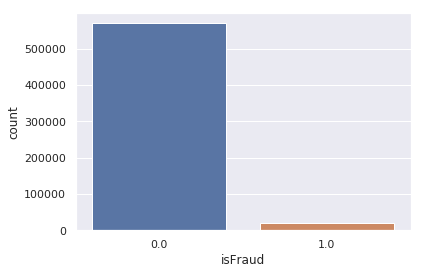

In [20]:
sns.countplot(y)

## Analys numbers of transactions

### Transaction Amount 

(0, 7000)

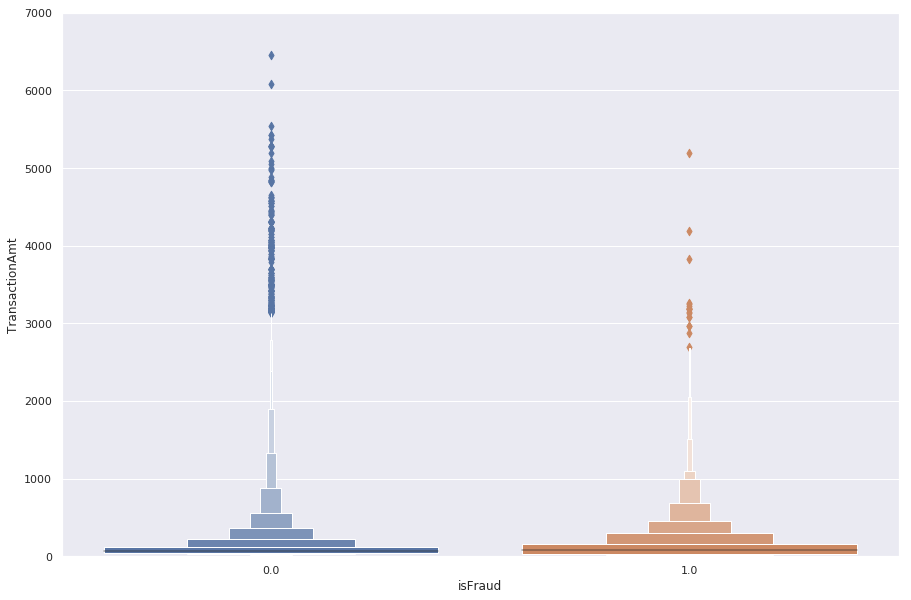

In [21]:
plt.figure(figsize=(15, 10))
sns.boxenplot(x=y, y=numbers_imputed['TransactionAmt'])
plt.ylim(top=7000, bottom=0)

As you see we set a ylim to plot. Because there is a number with value about 30000. This number ruins away our plot. It also may destroy our training; therefore, we change numbers above 60000 to 6000. Also we can try to normalize datas.

In [22]:
class NormalizeByLog(BaseEstimator, TransformerMixin):
    def __init__(self, feature_name):
        self.feature_name = feature_name
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X[self.feature_name] = np.log1p(X[self.feature_name])
        return X

In [23]:
numbers_ta_filtered = NormalizeByLog('TransactionAmt').transform(numbers_imputed)

In [24]:
del numbers_imputed

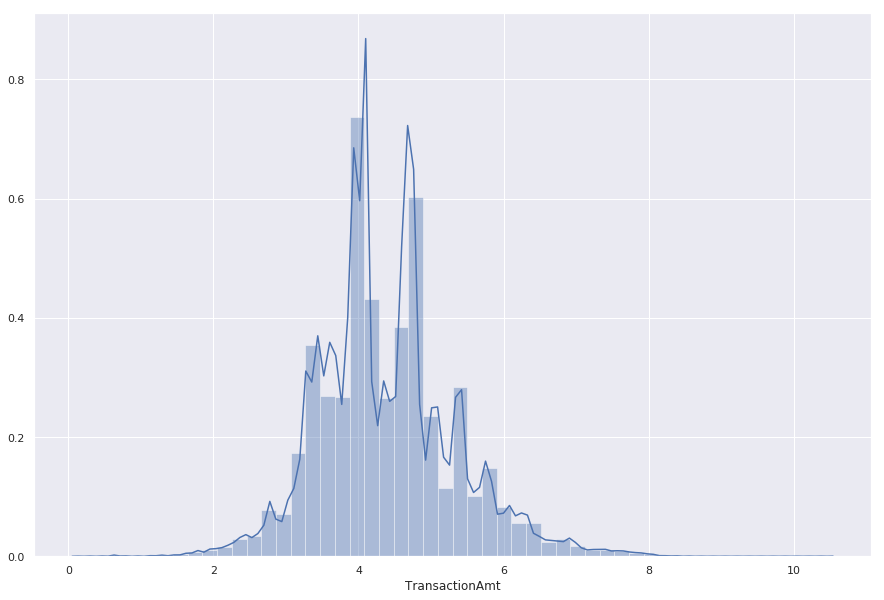

In [25]:
plt.figure(figsize=(15, 10))
sns.distplot(numbers_ta_filtered['TransactionAmt'])

### TransactionDT

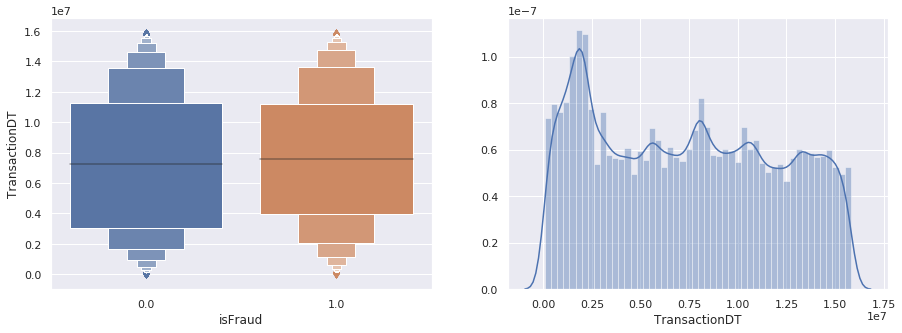

In [26]:

plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.boxenplot(x=y, y=numbers_ta_filtered['TransactionDT'])
plt.subplot(122)
sns.distplot(numbers_ta_filtered['TransactionDT'])

TransactionDT has a normall distriboution and no need to change.

In [27]:
numbers_ta_filtered.info(max_cols=400)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 431 entries, TransactionDT to id_35_count_full
dtypes: float64(431)
memory usage: 1.9 GB


### cards

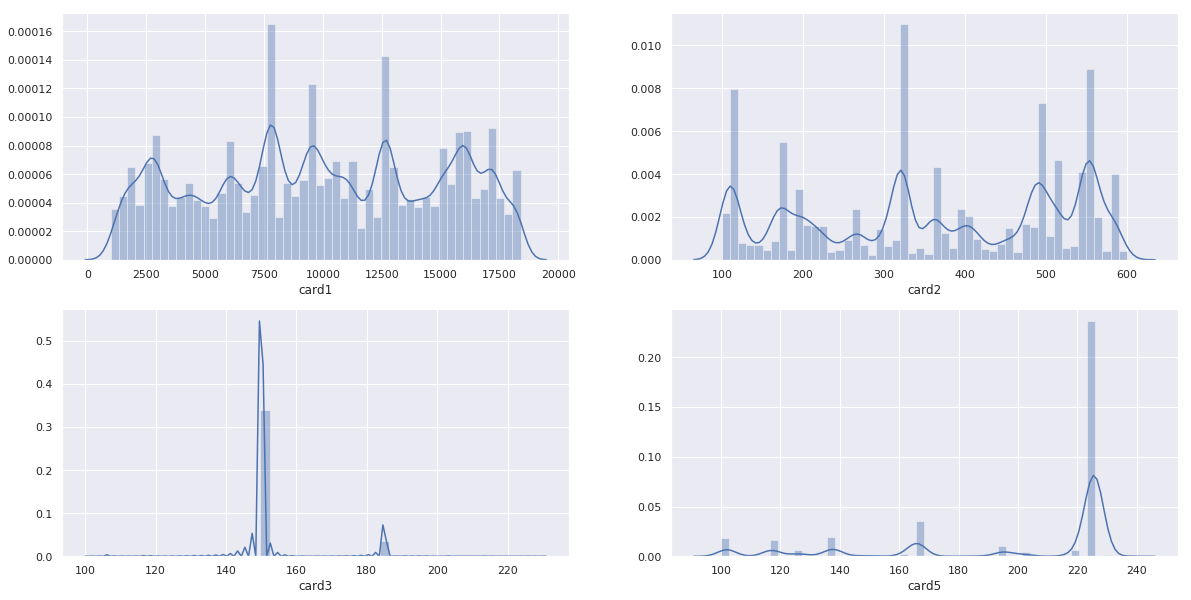

In [28]:
plt.figure(figsize=(20, 10))
l = 0
for i in range(5):
    att = 'card' + str(i+1)
    if att in numbers_ta_filtered:
        l+=1
        plt.subplot(2, 2, l)
        sns.distplot(numbers_ta_filtered[att], )


In [29]:
numbers_ta_filtered['card3'].value_counts().head()

150.0    522852
185.0     56346
106.0      1571
146.0      1252
144.0      1252
Name: card3, dtype: int64

We will drop card3 becasue most of them have a specific value. Here there is a lot of 127-128 numbers (about 522000).

In [30]:
to_drop_numbers = ['card3']

### dist

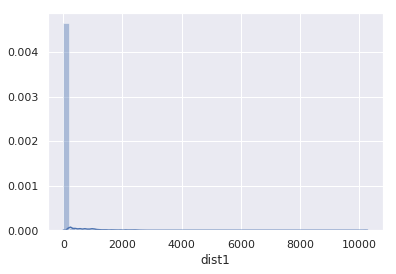

In [31]:
sns.distplot(numbers_ta_filtered['dist1'])

In [32]:
numbers_ta_filtered['dist1'].value_counts()

0.0       372095
1.0        18330
2.0        17028
4.0        13067
3.0        12808
           ...  
2728.0         1
1780.0         1
3300.0         1
3980.0         1
3344.0         1
Name: dist1, Length: 2412, dtype: int64

### addrs

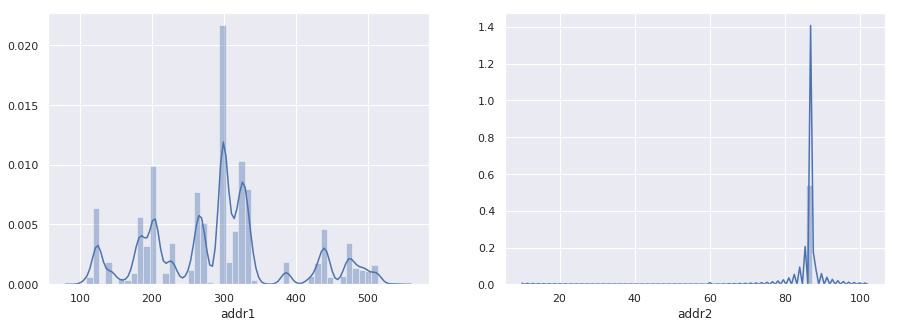

In [33]:
plt.figure(figsize=(15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    sns.distplot(numbers_ta_filtered['addr' + str(i+1)])

In [34]:
np.unique(numbers_ta_filtered['addr2'].values, return_counts = True)

(array([ 10.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  34.,
         35.,  36.,  38.,  39.,  40.,  43.,  44.,  46.,  47.,  48.,  49.,
         50.,  51.,  52.,  54.,  55.,  57.,  59.,  60.,  61.,  62.,  63.,
         65.,  66.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  82.,  83.,  84.,  86.,  87.,  88.,  89.,  92.,
         93.,  94.,  96.,  97.,  98., 100., 101., 102.]),
 array([     8,      7,      1,      1,     55,      7,      3,     33,
             3,      5,      1,      2,      3,      1,     25,     20,
             4,     11,      4,     47,     91,     16,      1,      2,
             3,      3,      3,     12,      3,      3,      4,      4,
             1,      1,      4,      5,      6,      1,     10,     17,
          3084,      3,      4,      2,     82,      2,     10,     17,
             1,      7,      6,      5,      3,      1,      2,   

From above counts we can recognize most of addr2 features are 86-87. So we can drop this feature from our train set because it we doesn't need this, and it does not have any specific imapct on our predictions.

In [35]:

to_drop_numbers.append('addr2')

## C attributes

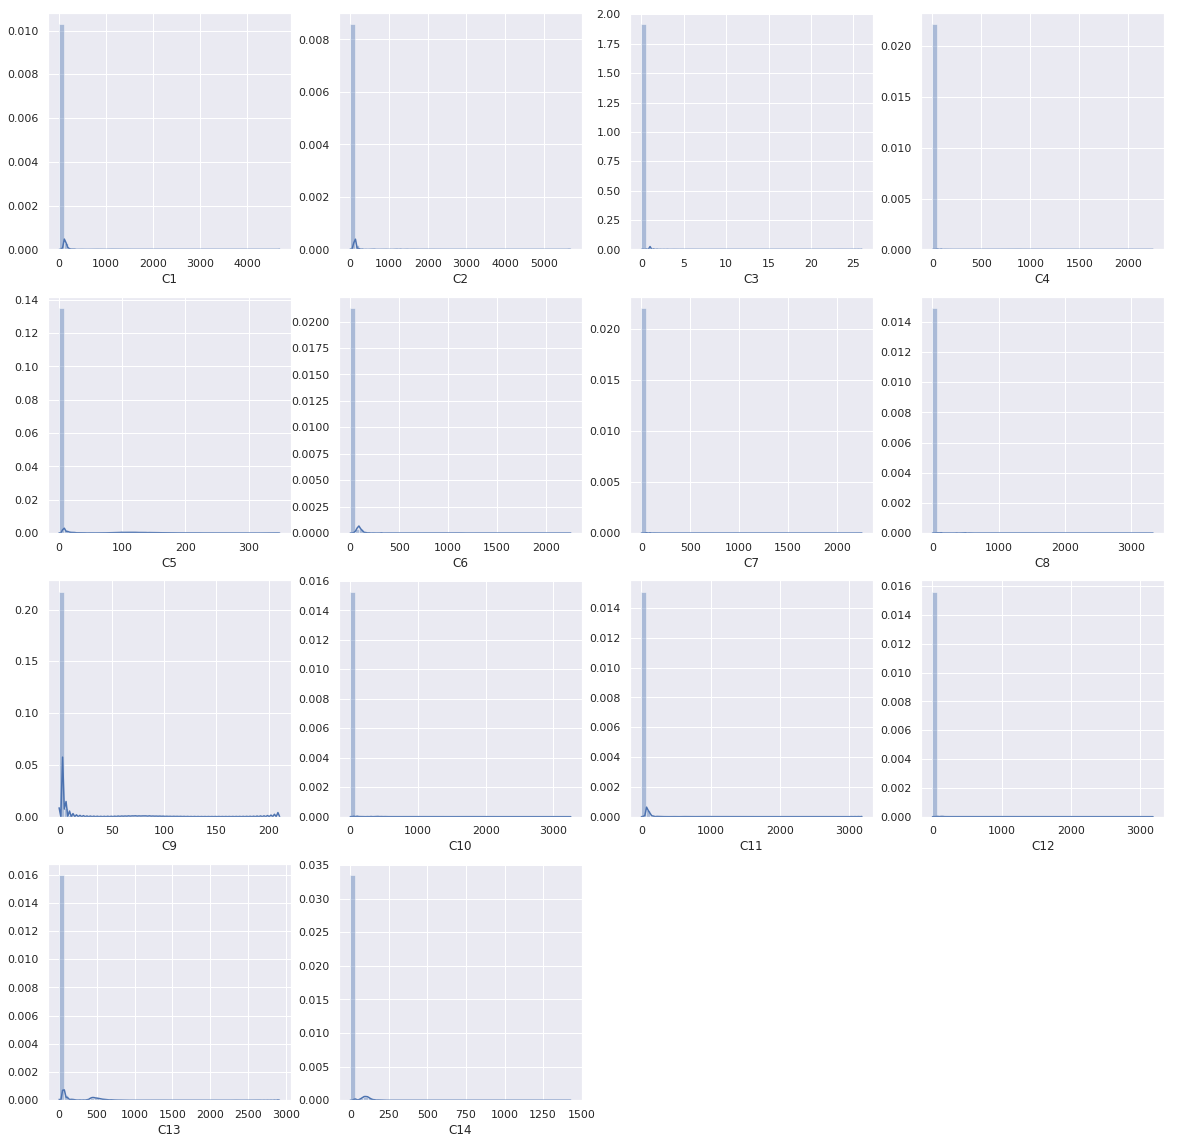

In [36]:
plt.figure(figsize=(20, 20))
for i in range(14):
    plt.subplot(4, 4, i+1)
    sns.distplot(numbers_ta_filtered['C' + str(i+1)])


In [37]:
plt.figure(figsize=(15, 25))
for i in range(14):
    counts = np.unique(numbers_ta_filtered['C' + str(i+1)], return_counts=True)
    less_than_ten = 0
    for j in range(len(counts[0])):
        if counts[0][j] <= 4:
            less_than_ten += counts[1][j]
    print('C' + str(i+1), less_than_ten)
    

C1 502516
C2 500673
C3 590493
C4 583545
C5 550111
C6 530016
C7 585564
C8 576898
C9 539263
C10 577864
C11 531747
C12 584003
C13 349150
C14 519840


<Figure size 1080x1800 with 0 Axes>

Lots of C values are less than 4. we can categorize C attributes into 4 category by their period of values.

There is a lot of numbers which are less than 4. On the other hand there is some numbers with higher value. We can divide these numbers into 4 groups. less than equal 4 and more than 4. 

In [38]:
class CategorizeCs(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        for i in range(14):
            att = 'C'+str(i+1)
            if att in X :
                X[att] = X[att].apply(lambda l : l if l <=4 else 4)
        return X

In [39]:
numbers_cat = CategorizeCs().transform(numbers_ta_filtered)

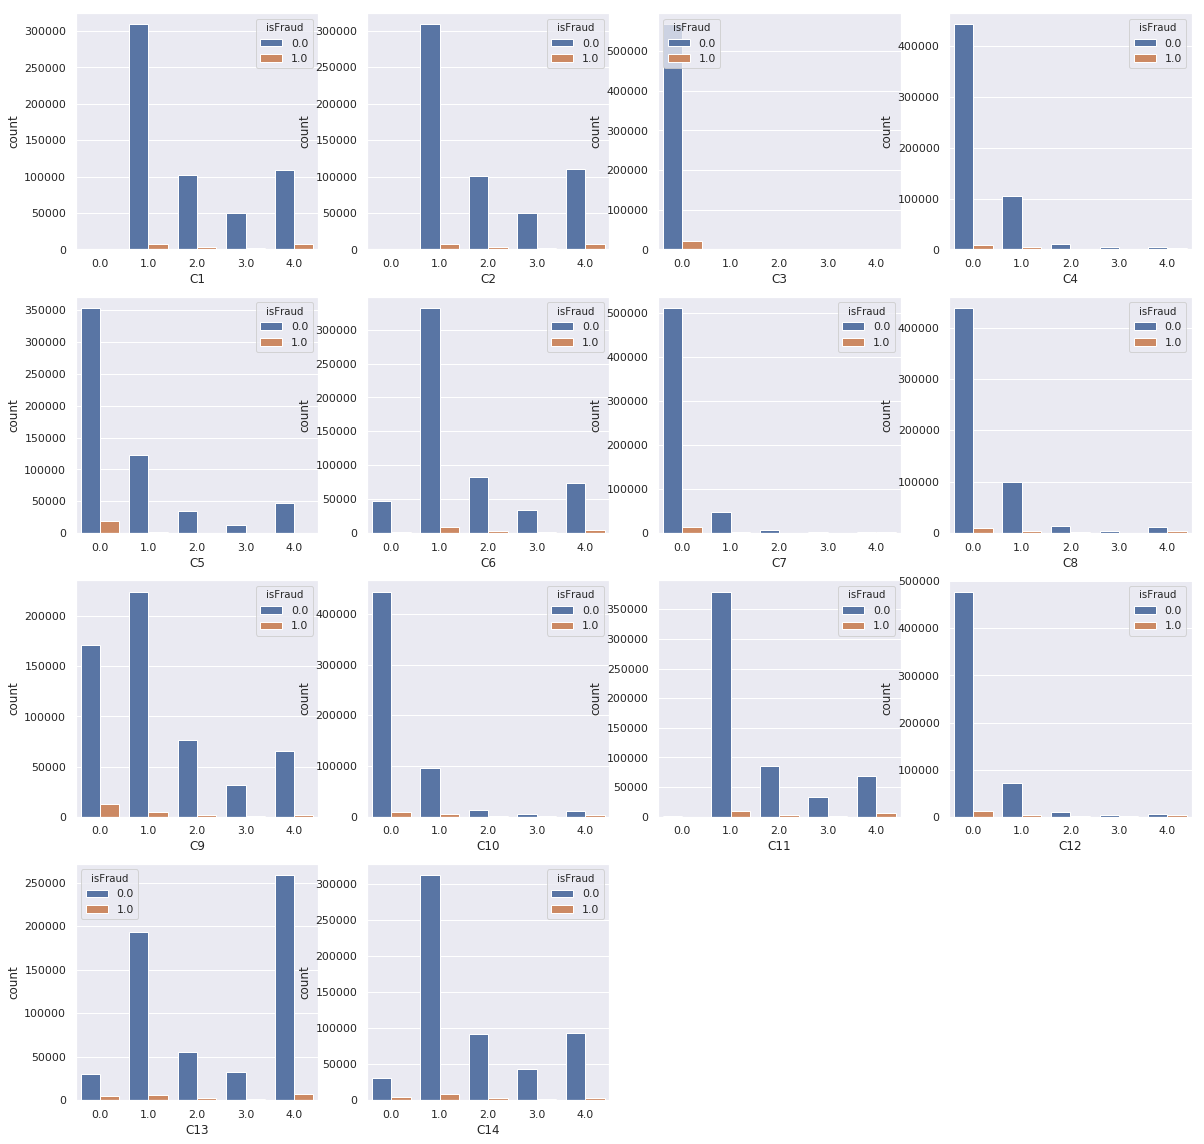

In [40]:
plt.figure(figsize=(20, 20))
for i in range(14):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=numbers_cat['C' + str(i+1)], hue=y)
#     sns.kdeplot(numbers_cat['C' + str(i+1)])

From above plots we recognize all c3 values are zero, so, it is useless and we will drop it. On the other hand C7 can categorize by 2 instead of 4. so, we will change CategorizeCs class.'

In [41]:
to_drop_numbers.append('C3')

In [42]:
class CategorizeCs(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        for i in range(14):
            att = 'C'+str(i+1)
            if att == 'C7' and att in X : 
                X[att] = X[att].apply(lambda l : l if l <=2 else 2)
            elif att in X :
                X[att] = X[att].apply(lambda l : l if l <=4 else 4)
        return X
numbers_cat = CategorizeCs().transform(numbers_ta_filtered)

In [43]:
del numbers_ta_filtered

## D attributes

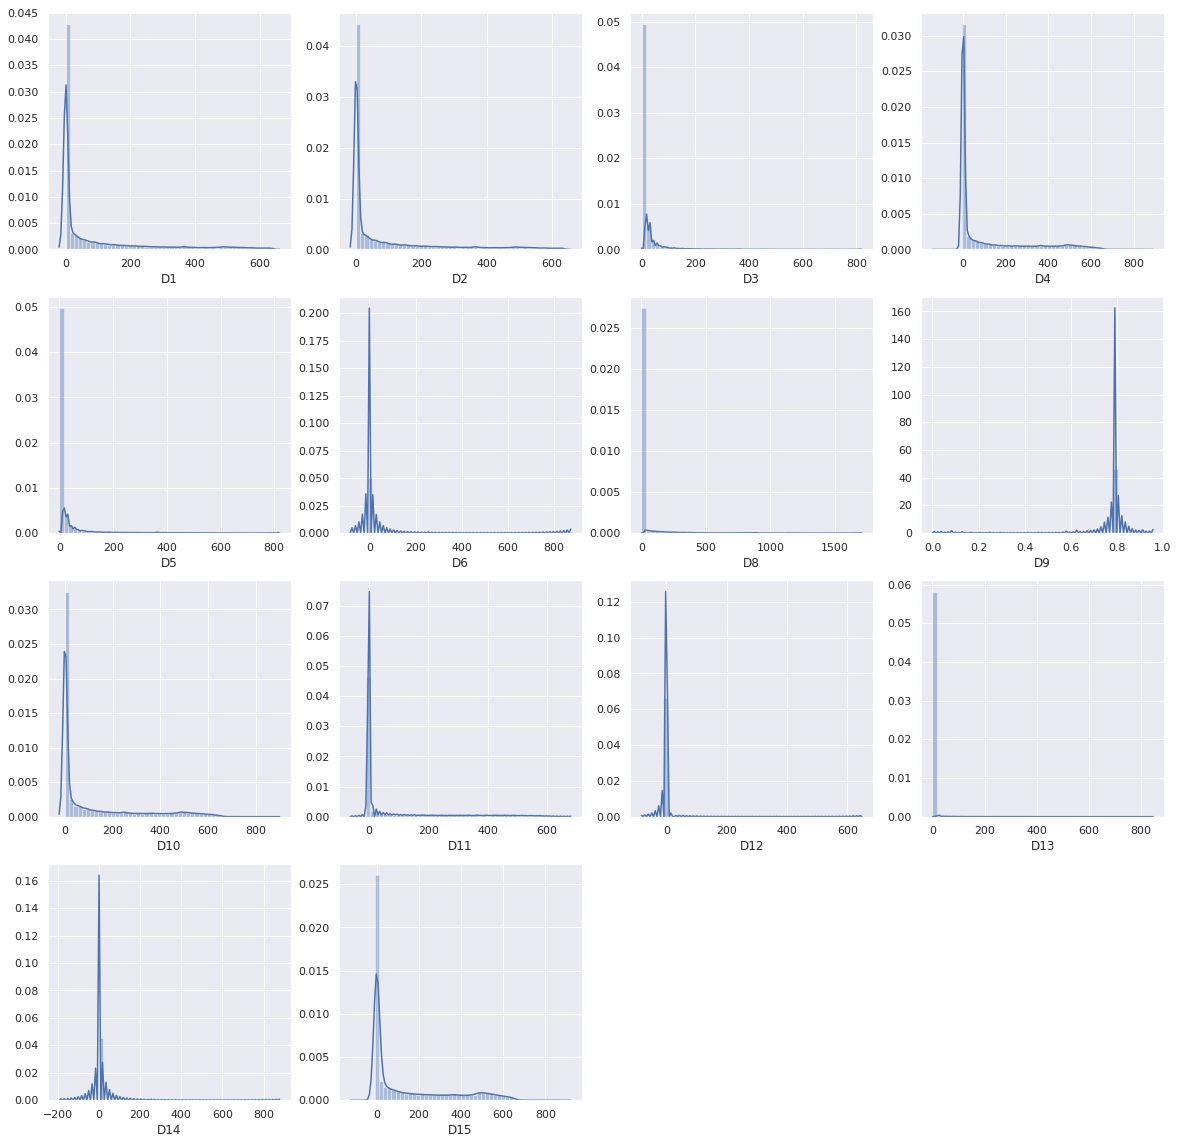

In [44]:
plt.figure(figsize=(20, 20))
j = 1;
for i in range(15):
    att = 'D' + str(i+1)
    if att in numbers_cat:
        plt.subplot(4, 4, j)
        sns.distplot(numbers_cat['D' + str(i+1)])
        j+=1

I think it is ok !

## V attributes

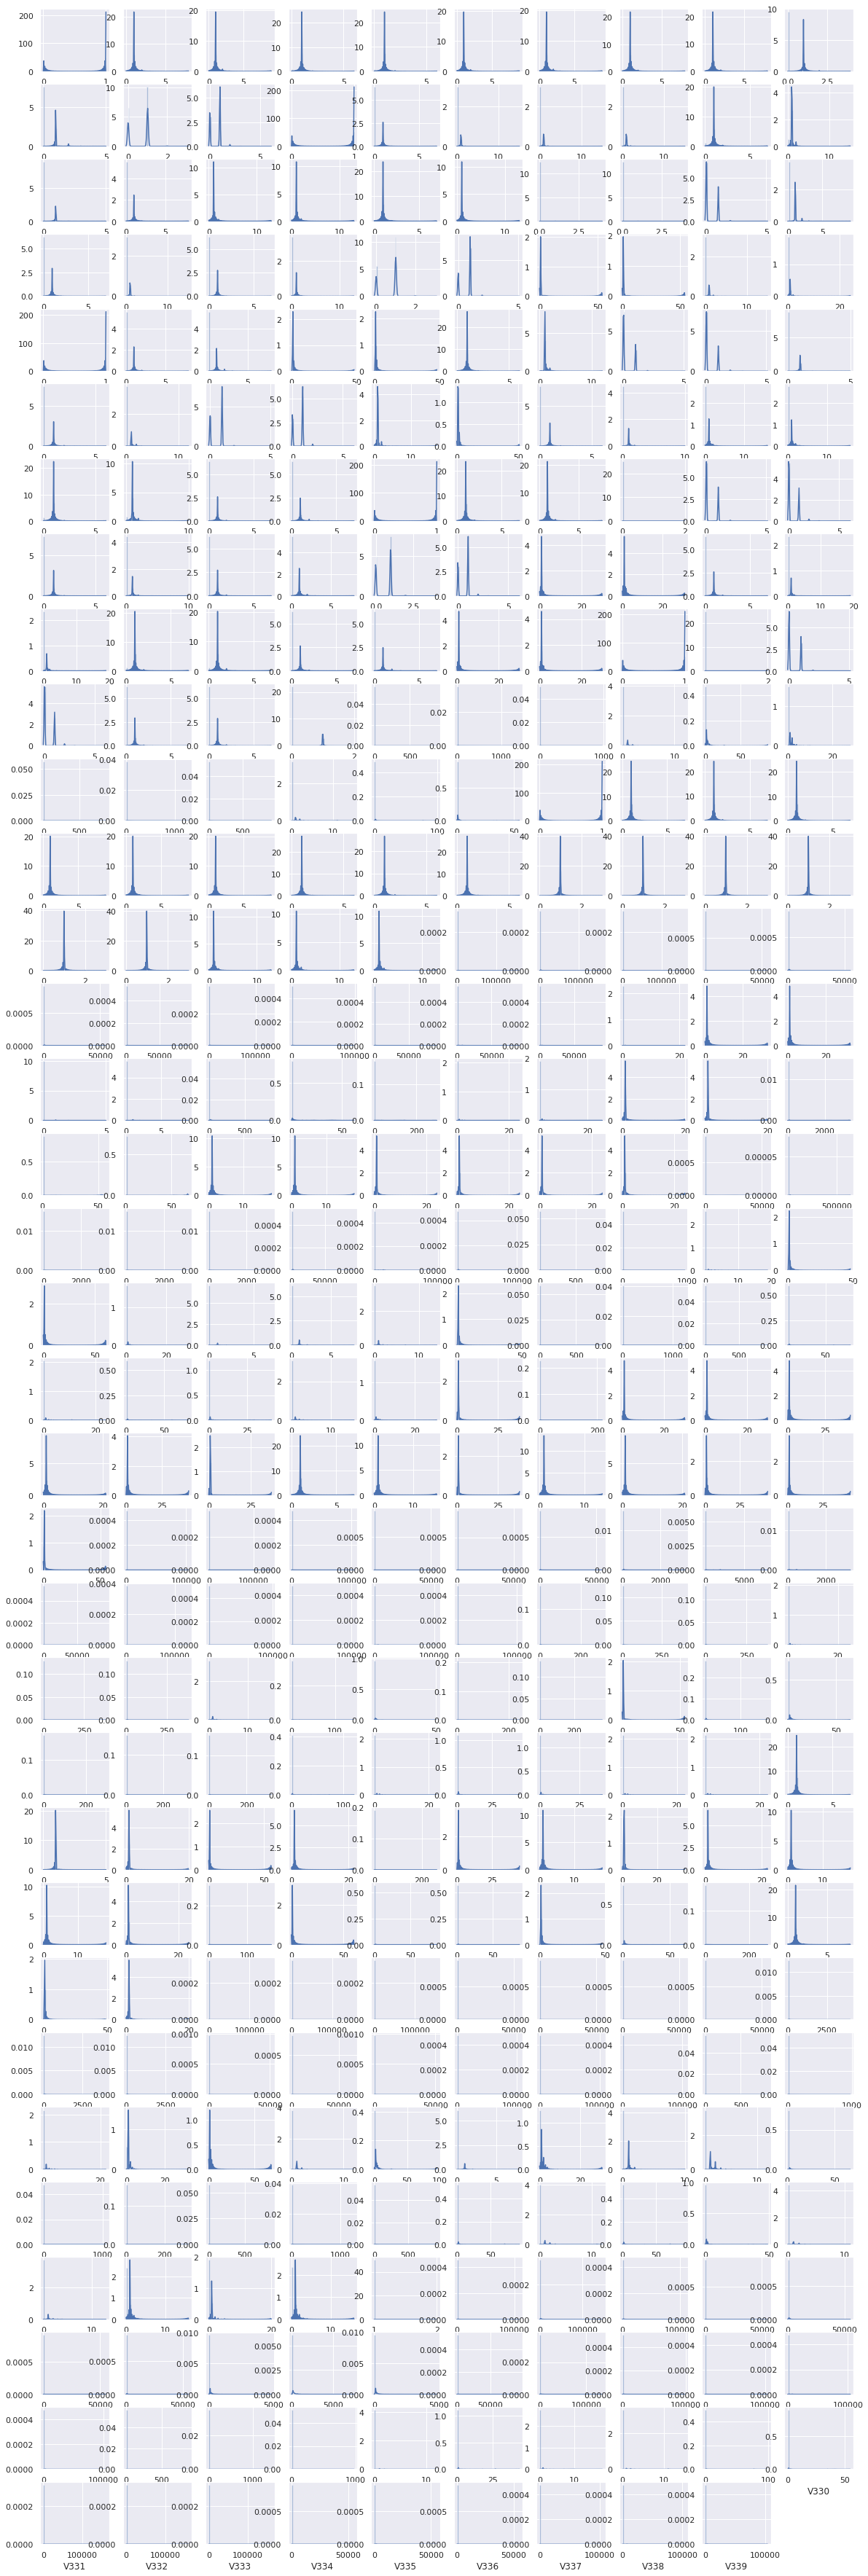

In [45]:
plt.figure(figsize=(20, 64))
j = 1;
for i in range(340):
    att = 'V' + str(i+1)
    if att in numbers_cat:
        plt.subplot(34, 10, j)
        sns.distplot(numbers_cat['V' + str(i+1)])
        j+=1

Here we delete features which have just two value more than 85 percent of all values. 

In [46]:
class DropExtraVs(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        self.to_drop = []
        for i in range(340):
            att = 'V' + str(i+1)
            if att in X :
                counts = np.unique(X[att], return_counts=True)[1]
                counts.sort()
                if (counts[len(counts) - 1] + counts[len(counts) - 2]) > 0.85 * len(X) :
                    self.to_drop.append(att)
        return self
    def transform(self, X, y=None):
        return X.drop(self.to_drop, axis=1) 

In [47]:
dropper = DropExtraVs()
numbers_v_droped = dropper.fit_transform(numbers_cat)

In [48]:
numbers_v_droped.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,...,card2__dist1,card1__card5,card2__id_20,card5__P_emaildomain,addr1__card1,id_01_count_dist,id_31_count_dist,id_33_count_dist,id_35_count_dist,id_35_count_full
0,86400.0,4.241327,13926.0,321.0,150.0,142.0,315.0,87.0,19.0,1.0,...,25180.0,3644.0,6958.0,446.0,21455.0,446307.0,450258.0,517251.0,449555.0,819269.0
1,86401.0,3.401197,2755.0,404.0,150.0,102.0,325.0,87.0,0.0,1.0,...,14749.0,8467.0,4003.0,39.0,23673.0,446307.0,450258.0,517251.0,449555.0,819269.0
2,86469.0,4.094345,4663.0,490.0,150.0,166.0,330.0,87.0,287.0,1.0,...,18595.0,10032.0,5124.0,650.0,26137.0,446307.0,450258.0,517251.0,449555.0,819269.0
3,86499.0,3.931826,18132.0,567.0,150.0,117.0,476.0,87.0,0.0,2.0,...,23807.0,7468.0,6539.0,149.0,34597.0,446307.0,450258.0,517251.0,449555.0,819269.0
4,86506.0,3.931826,4497.0,514.0,150.0,102.0,420.0,87.0,0.0,1.0,...,20607.0,9904.0,5411.0,39.0,29634.0,19555.0,1061.0,544.0,77814.0,149464.0


## Colinearity 

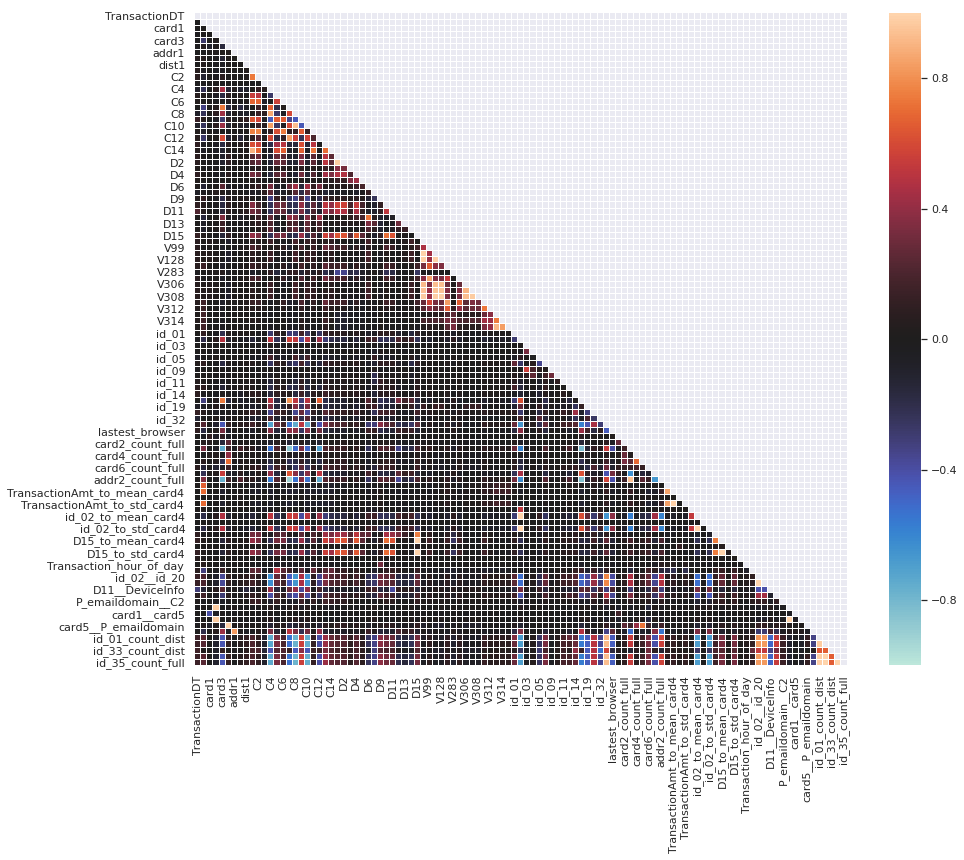

In [49]:
corr = numbers_v_droped.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0,vmin=-1 , 
            square=True, linewidths=.005)

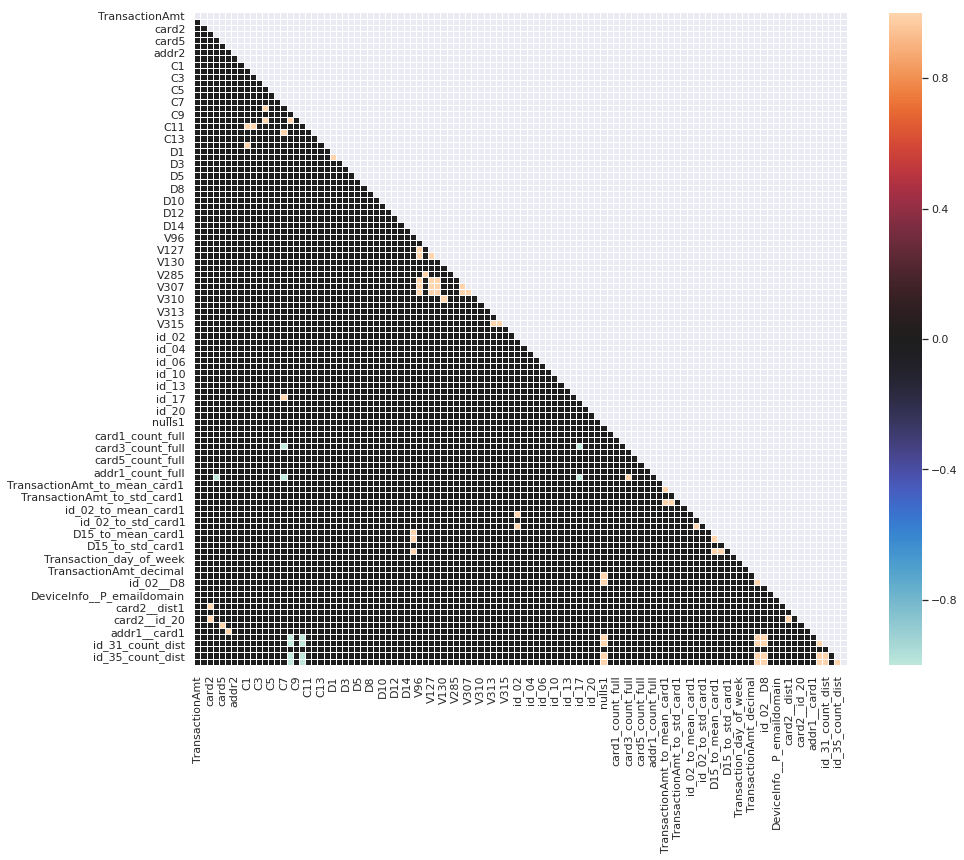

In [50]:
corr = corr.iloc[1:, 1:]
corr = corr.applymap(lambda x : 1 if x > 0.75 else -1 if x < -0.75 else 0)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0,vmin=-1 , 
            square=True, linewidths=.005)

There are a lot of features which have colinearity with each other. First we see every feature correlation with isFraud. Then add some atts to `to_drop` set.

In [51]:
numbers_v_droped['isFraud'] = y


In [52]:
numbers_v_droped.corr()['isFraud'].sort_values()

addr2_count_full   -0.163040
card3_count_full   -0.151952
id_01_count_dist   -0.141146
id_35_count_dist   -0.138184
id_35_count_full   -0.137736
                      ...   
C10                 0.211045
C8                  0.220683
C4                  0.235883
C12                 0.238799
isFraud             1.000000
Name: isFraud, Length: 108, dtype: float64

In [53]:
to_drop_numbers += ['V314', 'V315', 'V308', 'V306', 'V131', 'V130', 'V128', 'V127', 'V285', 'V96', 'V91', 'V82', 'V76',
                    'V49', 'V48', 'V36', 'V11', 'D2', 'C10', 'C7', 'C8', 'C11', 'C1']

## Drop extra columns
We gather some columns to drop in these steps. Now in this step we will drop them from dataframe.

In [54]:
class DataFrameDropper(BaseEstimator, TransformerMixin):
    def __init__(self, drop_attrs=[]):
        self.drop_attrs = drop_attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X.drop(self.drop_attrs, axis=1, inplace=True, errors='ignore')
        return X

In [55]:
final_numbers = DataFrameDropper(drop_attrs=to_drop_numbers).transform(numbers_v_droped)

In [56]:
del numbers_v_droped

In [57]:
del numbers_cat

In [58]:
gc.collect()

1463498

## Analys Labels of Transactions

In [59]:
labels_p_imputed.head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,W,discover,credit,NaN,NaN,T,T,T,M2,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan
2987001,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,google,com,NaN,nan
2987002,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,microsoft,com,NaN,nan
2987003,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,yahoo,com,NaN,nan
2987004,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,...,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,google,com,NaN,nan


At first we impute null values in our dataframe. For this act we use most frequent value of every columns.


In [60]:
class LabelImputer(TransformerMixin, BaseEstimator):
    def __init__(self, dummy=False):
      self.dummy = dummy
    def fit(self, X, y=None):
        self.tops = [[], []]
        for col in X:
            self.tops[0].append(str(col))
            self.tops[1].append(X[col].describe()['top'])
        return self
    def transform(self, X, y=None):
        X = X.copy()
        if self.dummy:
          return X.fillna('-9999')
        for i in range(len(self.tops[0])):
            X[self.tops[0][i]].fillna(self.tops[1][i], inplace=True)
        return X

In [61]:
label_imputer = LabelImputer(dummy=False)
label_imputed = label_imputer.fit_transform(labels_p_imputed)

Then we try to analys each column separately.

### Prodocut CD

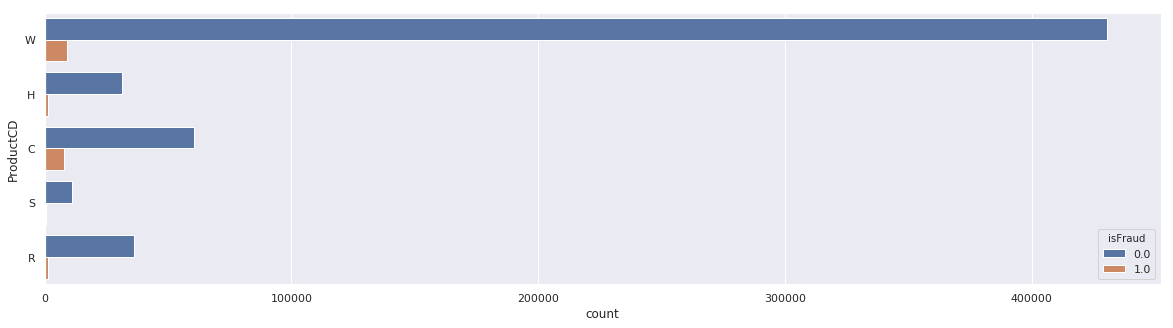

In [62]:
plt.figure(figsize=(20, 5))
sns.countplot(y=label_imputed['ProductCD'].reset_index()['ProductCD'], hue=y, data=label_imputed)

In [63]:
del labels_p_imputed

It seems most of ProductCDs values are `W`. On the other hand `C` values have a good possibility to be Fraud. This data seems has not any specific problem.

### cards

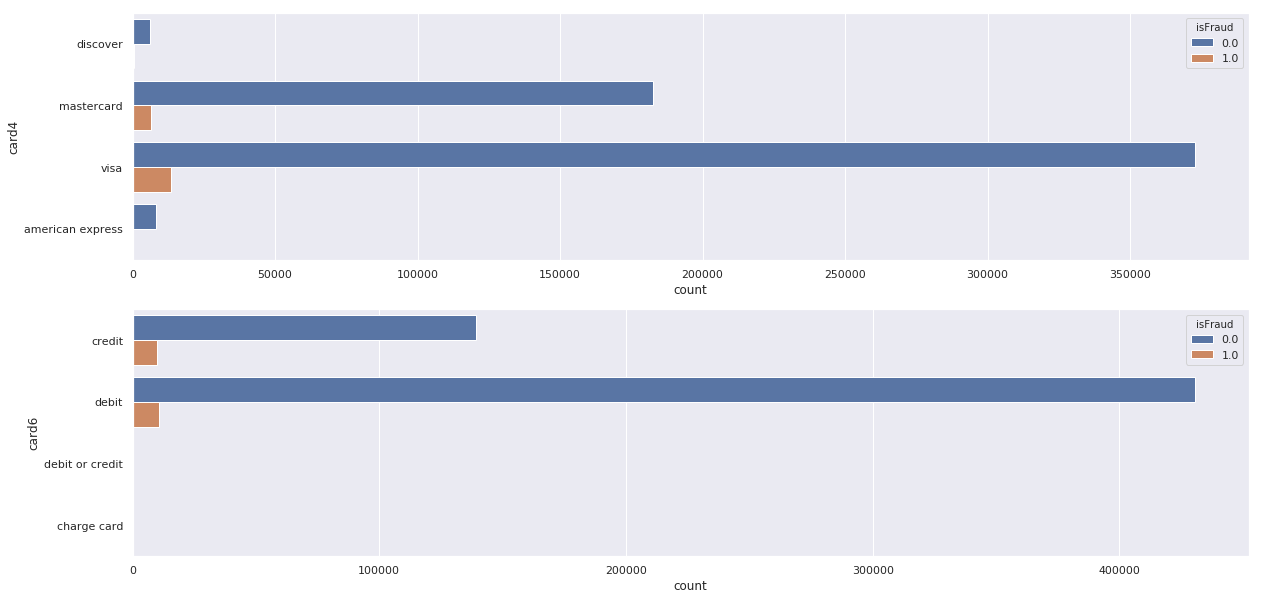

In [64]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
sns.countplot(y=label_imputed['card4'].reset_index()['card4'], hue=y)
plt.subplot(212)
sns.countplot(y=label_imputed['card6'].reset_index()['card6'], hue=y)

In card6 we have two category which have not any count. Let see values count correctly.


In [65]:
label_imputed[['card6', 'card4']].groupby('card6').agg(['count']).stack()

,,card4
card6,,
charge card,count,15
credit,count,148986
debit,count,441509
debit or credit,count,30


There is 15 charge card and 30 debit or credit which all of them are not fraud. so we change these two category into debit.


In [66]:
class ChangeToDebit(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X['card6'] = X['card6'].apply(lambda l: l if not l == 'debit or credit' and not l == 'charge card' else 'debit')
        return X

In [67]:
label_card6_changed = ChangeToDebit().transform(label_imputed)

card4 seems to be correct and we don't change it.

### P_emaildomain

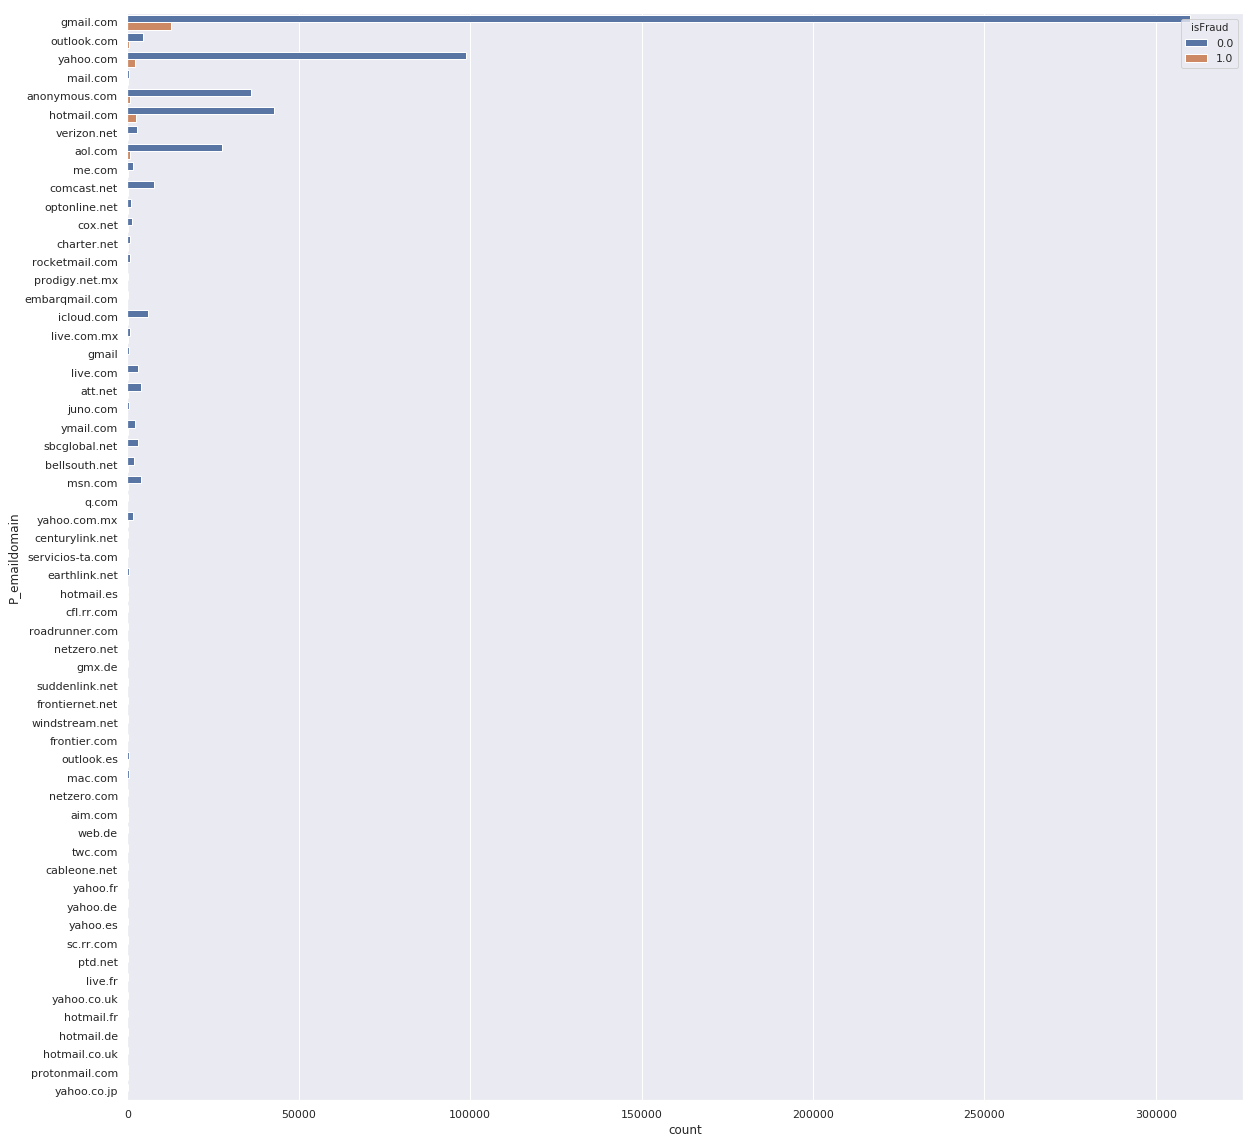

In [68]:
plt.figure(figsize=(20, 20))
sns.countplot(y=label_card6_changed['P_emaildomain'].reset_index()['P_emaildomain'], hue=y)

From this plot we can make new categoris. `gmail.com` , `yahoo.com`, `anonymous.com`, `hotmail.com`, `aol.com` and `others`.

In [69]:
class CategorizeEmail(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X['P_emaildomain'] = X['P_emaildomain'].apply(lambda l: l if l == 'gmail.com' or 
                                                      l == 'yahoo.com' or
                                                      l == 'anonymous.com' or 
                                                      l == 'hotmail.com' or
                                                      l == 'aol.com'
                                                      else 'others')
        return X

In [70]:
label_mail_changed = CategorizeEmail().transform(label_card6_changed)

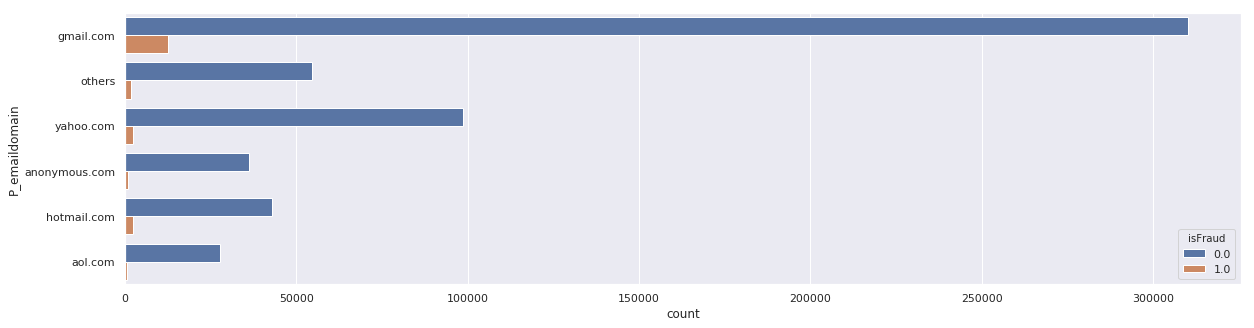

In [71]:
plt.figure(figsize=(20, 5))
sns.countplot(y=label_mail_changed['P_emaildomain'].reset_index()['P_emaildomain'], hue=y)

### M6

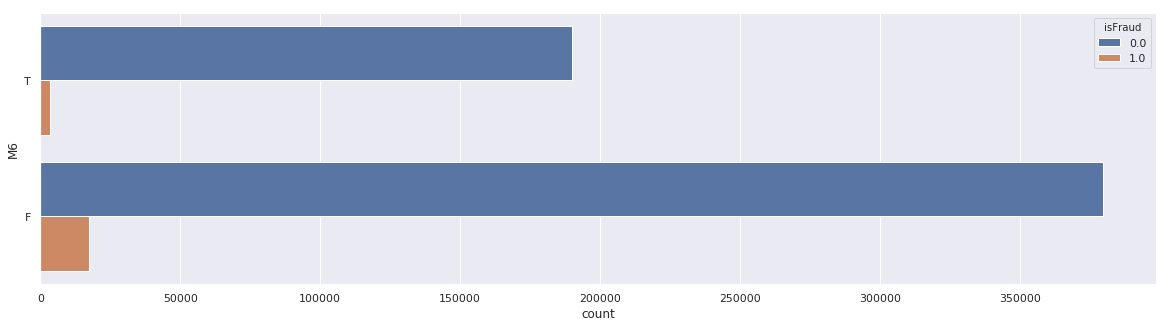

In [72]:
plt.figure(figsize=(20, 5))
sns.countplot(y=label_mail_changed['M6'].reset_index()['M6'], hue=y)

It seems has not any problem.

### Encoding labels

In [73]:
from sklearn.preprocessing import OneHotEncoder
class OneHotGoodEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder()
    def fit(self, X, y=None): 
        self.encoder.fit(X)
        return self
    def transform(self, X, y=None):
        columns = X.columns
        X_transformed = self.encoder.transform(X).toarray()
        cats = self.encoder.categories_
        i = 0
        labels = []
        for cat in cats:
            for c in cat:
                labels.append(columns[i] + ' : ' + c)
            i = i+1
        return pd.DataFrame(X_transformed, columns=labels)

In [74]:
encoder = OneHotGoodEncoder()
encoder.fit(label_mail_changed)
label_encoded = encoder.transform(label_mail_changed)

MemoryError: Unable to allocate array with shape (590540, 2408) and data type float64

#### Compute P-Value score
With p-value we can recognize to delete which one of them.

In [75]:
from sklearn.feature_selection import f_regression
F, p_value = f_regression(label_encoded, y)
np.array(label_encoded.columns) + " = " + (p_value < 0.05).astype(str) 

NameError: name 'label_encoded' is not defined

All of categories have true values. So we can not delete them. 

In [76]:
from sklearn.preprocessing import LabelEncoder
class ModifiedLabelEncoder(TransformerMixin, BaseEstimator):
    def fit(self,X, y=None):
        self.cols=X.columns
        return self
    def transform(self,X, y=None):
        X=X.copy()
        for f in self.cols:
          if X[f].dtype=='object': 
            lbl = LabelEncoder()
            lbl.fit(list(X[f].values) )
            X[f] = lbl.transform(list(X[f].values))
        return X

In [77]:
del label_mail_changed
del label_encoded
del label_card6_changed

NameError: name 'label_encoded' is not defined

# Analys Identity

## Impute

## Analyis identity numbers 

### Impute

In [78]:
iden_numbers_imputed = final_numbers

In [79]:
id_to_drop = []

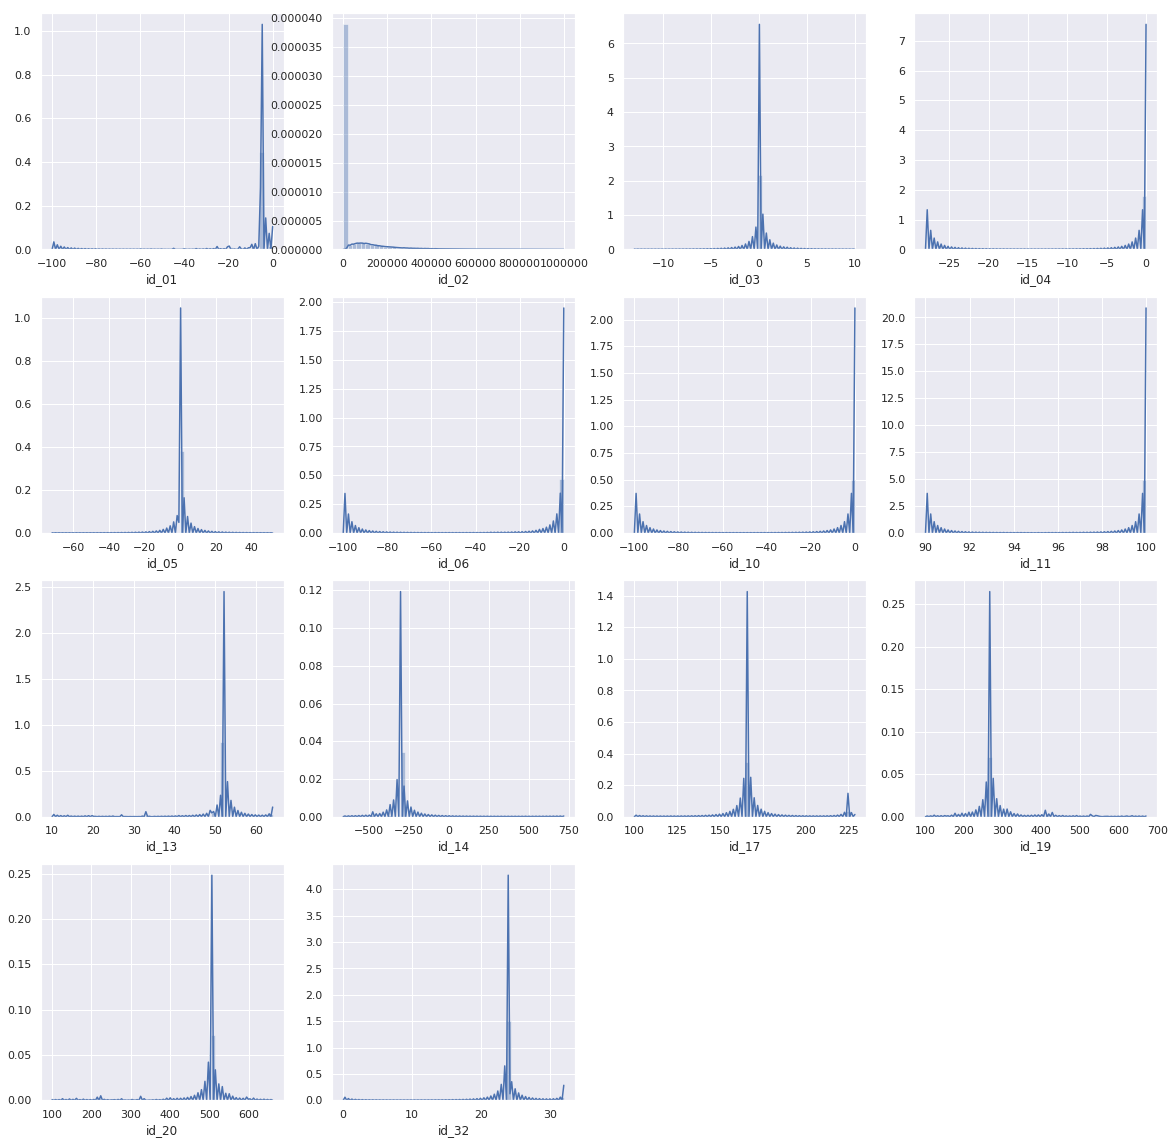

In [80]:
ids = ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_08', 'id_10', 
      'id_11', 'id_12', 'id_13', 'id_14', 'id_17', 'id_19', 'id_20', 'id_32']
cols = list(iden_numbers_imputed.columns)
plt.figure(figsize=(20, 20))
j = 1
for i in range(len(cols)):
    if(str(cols[i]) in ids):
      plt.subplot(4, 4, j)
      j+=1
      sns.distplot(iden_numbers_imputed[cols[i]])

### id_03

In [81]:
train_numbers['id_03'].value_counts(dropna=False, normalize=True).head()

NaN    0.887689
0.0    0.108211
1.0    0.001461
3.0    0.001131
2.0    0.000713
Name: id_03, dtype: float64

98 percent of datas are either missing or zero, so we will drop it.

In [82]:
id_to_drop.append('id_3')

### id_04

In [83]:
train_numbers['id_04'].value_counts(dropna=False, normalize=True).head()

 NaN    0.887689
 0.0    0.111320
-5.0    0.000224
-6.0    0.000166
-8.0    0.000108
Name: id_04, dtype: float64

In [84]:
id_to_drop.append('id_04')

### id_09

In [85]:
train_numbers['id_09'].value_counts(dropna=False, normalize=True).head()

NaN    0.873123
0.0    0.119176
1.0    0.002736
3.0    0.001636
2.0    0.001309
Name: id_09, dtype: float64

In [86]:
id_to_drop.append('id_09')

### id_10

In [87]:
train_numbers['id_10'].value_counts(dropna=False, normalize=True).head()

 NaN    0.873123
 0.0    0.123411
-6.0    0.000500
-5.0    0.000418
-1.0    0.000339
Name: id_10, dtype: float64

In [88]:
id_to_drop.append('id_10')

### Check colinearity


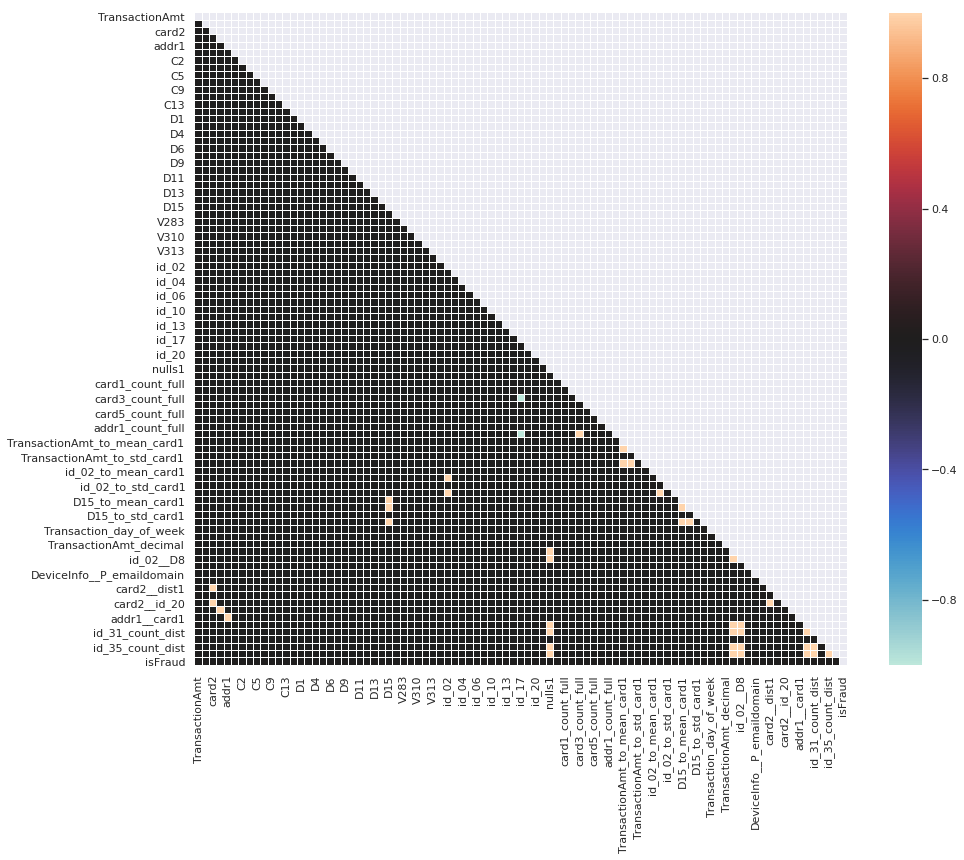

In [89]:
corr = iden_numbers_imputed.corr()
corr = corr.iloc[1:, 1:]
corr = corr.applymap(lambda x : 1 if x > 0.75 else -1 if x < -0.75 else 0)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0,vmin=-1 , 
            square=True, linewidths=.005)

## Analys identity lables

In [90]:
id_labels_to_drop = list()

### Impute

In [91]:
iden_labels_imputed = label_imputed
del label_imputed

### Count Plot

In [92]:
# y_i = pd.merge(train_identity, train_transaction, how='inner', on = 'TransactionID')['isFraud']

In [93]:
cols = ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']

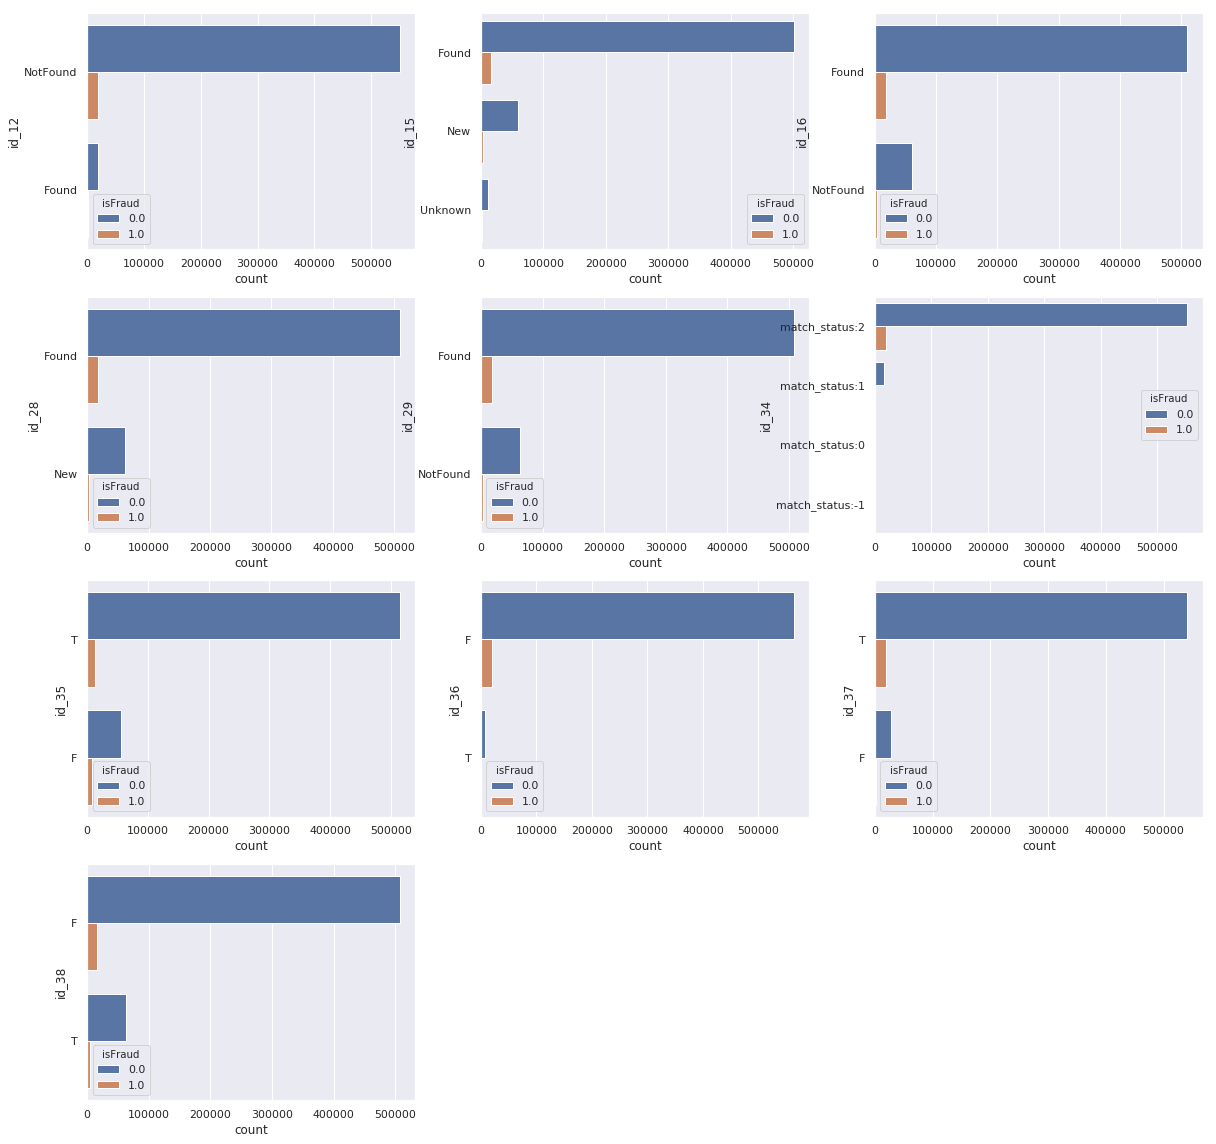

In [94]:
plt.figure(figsize=(20, 20))
for i in range(len(cols)):
    plt.subplot(4, 3, i+1)
    sns.countplot(y=iden_labels_imputed[cols[i]].reset_index()[cols[i]], hue=y)


In [95]:
iden_labels_imputed['id_34'].value_counts()

match_status:2     572746
match_status:1      17376
match_status:0        415
match_status:-1         3
Name: id_34, dtype: int64

Here we just change match_status: 0 & -1 into match_status : 1

In [96]:
class MeltMatchStatus(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X['id_34'] = X['id_34'].apply(lambda l: 'match_status:1' if l == 'match_status:0'
                                                                         or  l == 'match_status:-1' else l)
        return X

In [97]:
iden_label_melted = MeltMatchStatus().transform(iden_labels_imputed)

What about other cols `id_30`,`id_31`, `id_33`,`DeviceInfo`

### id_30

In [98]:
iden_label_melted['id_30'].value_counts().head()

Windows 10     534130
Windows 7       13110
iOS 11.2.1       3722
iOS 11.1.2       3699
Android 7.0      2871
Name: id_30, dtype: int64

In [99]:
class SimplifyOS(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
         return self
    def transform(self, X, y=None):
        X = X.copy()
        X['OS'] = X['id_30'].apply(lambda l: 'iOS' if l.find('iOS') is not -1 else 'Android' if l.find('Android') is not -1
                                  else 'Windows' if l.find('Windows') is not -1 else 'Mac' if l.find('Mac') is not -1 else 'Others')
        X.drop(['id_30'],axis=1, inplace=True)
        return X

In [100]:
iden_label_simple = SimplifyOS().transform(iden_label_melted)

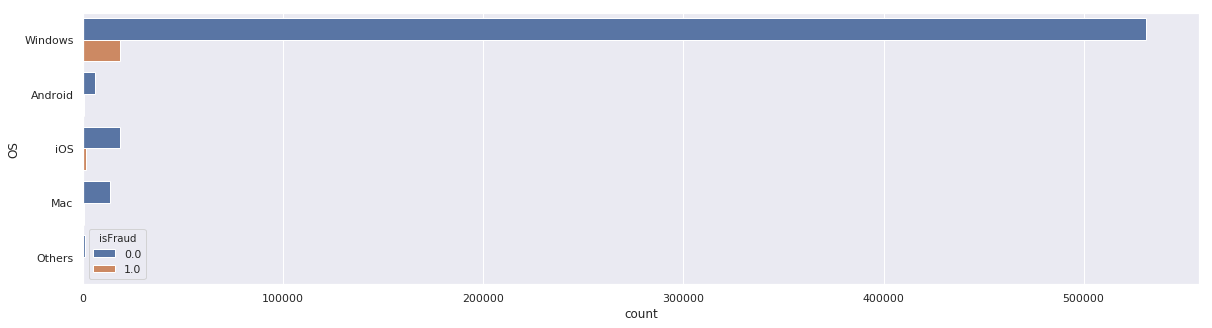

In [101]:
plt.figure(figsize=(20, 5))
sns.countplot(y=iden_label_simple['OS'].reset_index()['OS'], hue=y)

In [102]:
iden_label_simple['OS'].value_counts().head()

Windows    549714
iOS         19782
Mac         13580
Android      6303
Others       1161
Name: OS, dtype: int64

### Device Info

In [103]:
iden_label_simple['DeviceInfo'].value_counts().head()

Windows        519596
iOS Device      19782
MacOS           12573
Trident/7.0      7440
rv:11.0          1901
Name: DeviceInfo, dtype: int64

Its like OS and we will delete it. 

In [104]:
id_labels_to_drop.append('DeviceInfo')
iden_label_simple.drop(['DeviceInfo'], axis=1, inplace=True)

### id_31

In [105]:
class SimplifyBrowser(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
         return self
    def transform(self, X, y=None):
        X = X.copy()
        X['Browser'] = X['id_31'].apply(lambda l: 'm_chrome' if l.find('for android') is not -1 else 'm_safari' if l.find('mobile safari') is not -1
                                  else 'ie' if l.find('ie') is not -1 else 'ie' if l.find('edge') is not -1
                                       else 'safari' if l.find('safari') is not -1 else 'chrome' if l.find('chrome') is not -1 
                                       else 'firefox' if l.find('firefox') is not -1 else 'others')
        X.drop(['id_31'],axis=1, inplace=True)
        return X

In [106]:
iden_simple_browser = SimplifyBrowser().transform(iden_label_simple)

In [107]:
iden_simple_browser['Browser'].value_counts()

chrome      505458
m_safari     28368
m_chrome     20859
ie           16419
safari        8913
firefox       7012
others        3511
Name: Browser, dtype: int64

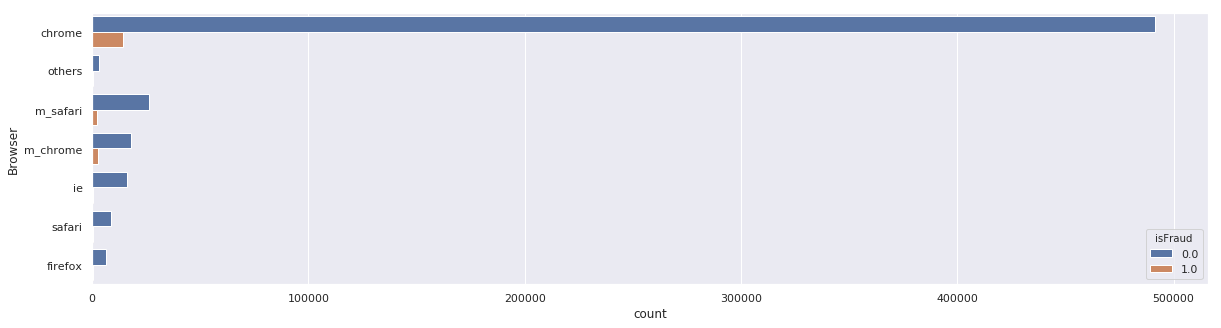

In [108]:
plt.figure(figsize=(20, 5))
sns.countplot(y=iden_simple_browser['Browser'].reset_index()['Browser'], hue=y)

### id_33

Well it is device size.

In [109]:
class ScreenSimplify(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X['Screen'] = X['id_33'].apply(lambda l : 'Big' if int(l[:l.find('x')]) *  int(l[l.find('x')+1:]) >= 2073600
                                       else 'Medium' if int(l[:l.find('x')]) *  int(l[l.find('x')+1:]) > 777040
                                       else 'Small')
        X.drop(['id_33'],axis=1, inplace=True)
        return X

In [110]:
iden_simple_screen = ScreenSimplify().transform(iden_simple_browser)

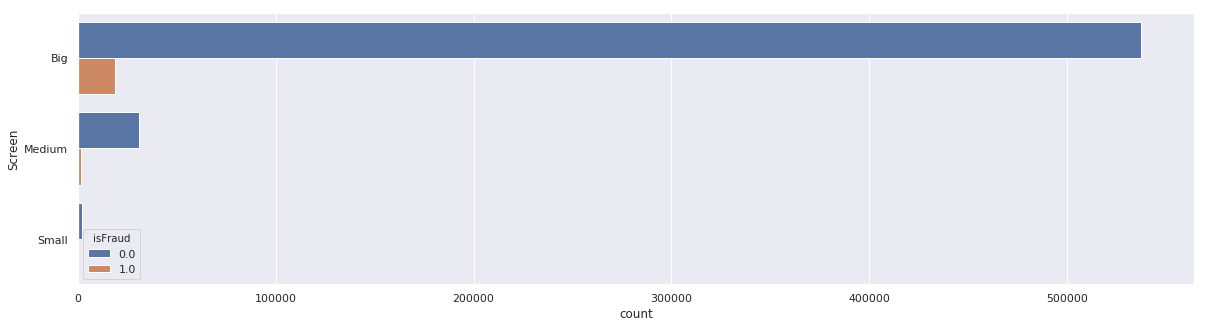

In [111]:
plt.figure(figsize=(20, 5))
sns.countplot(y=iden_simple_screen['Screen'].reset_index()['Screen'], hue=y)

### Check p-value

In [112]:
encoder = OneHotGoodEncoder()
encoder.fit(iden_simple_screen)
label_encoded = encoder.transform(iden_simple_screen)

In [113]:
from sklearn.feature_selection import f_regression
F, p_value = f_regression(label_encoded, y)
np.set_printoptions(threshold=40)
np.array(label_encoded.columns) + " = " + (p_value < 0.05).astype(str)

array(['ProductCD : C = True', 'ProductCD : H = True',
       'ProductCD : R = True', ..., 'Screen : Big = True',
       'Screen : Medium = True', 'Screen : Small = True'], dtype=object)

All of them are needed.

## Creating Pipeline 

In [114]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attrs):
        self.attrs = attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.loc[:, self.attrs]
class ToDataFrame(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return pd.DataFrame(X, columns=self.columns)
        

### Train Pipeline

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

numbers_pipeline = Pipeline([
    ('select', DataFrameSelector(numbers_attrs)),
    ('p_imputer', PercentImputer(percent=0.9)),
    ('s_imputer', SimpleImputer(strategy='mean')),
    ('to_dataFrame', ToDataFrame(columns=numbers_cols)),
    ('drop_dt_fraud', DataFrameDropper(drop_attrs=['isFraud'])),
    ('normalize', NormalizeByLog('TransactionAmt')),
    ('categorize', CategorizeCs()),
    ('dropVs',  DropExtraVs()),
    ('drop1', DataFrameDropper(drop_attrs=to_drop_numbers)),
    ('drop2', DataFrameDropper(drop_attrs=id_to_drop)),
    ('std_scale', StandardScaler())
])
# We use lgb and xgb, so reducing data does not make it better. We can 
# do not use some of our reductions and droppings. Do to that we have more
# features, therefore it got more time to train, yet we will have a better
# score.
labels_pipeline = Pipeline([
    ('select', DataFrameSelector(label_atrrs)),
    ('p_imputer', PercentImputer(percent=0.9)),
    ('l_imputer', LabelImputer(dummy=True)),
    ('change_debit', ChangeToDebit()),
#     ('categorize_email', CategorizeEmail()), 
    ('melt', MeltMatchStatus()),
#     ('os', SimplifyOS()),
#     ('browser', SimplifyBrowser()),
    ('screen', ScreenSimplify()),
#     ('drop', DataFrameDropper(drop_attrs=id_labels_to_drop)),
    ('encode', ModifiedLabelEncoder()),
    ('std_scale', StandardScaler())
])

pipeline = FeatureUnion([
    ('numbers', numbers_pipeline),
    ('labels', labels_pipeline),
])

In [116]:
gc.collect()

20074

In [117]:
del train_labels
del train_numbers

In [118]:
X_train = pipeline.fit_transform(train_set)
X_test = pipeline.transform(test_set)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1404: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [119]:
y_train = y
del y

In [120]:
X_train

array([[-1.57798669, -0.15110329,  0.82169536, ..., -0.52546723,
         0.52148805, -0.24235825],
       [-1.57798648, -1.04752683, -1.45755819, ..., -0.52546723,
         0.52148805, -0.24235825],
       [-1.57797175, -0.30793425, -1.06826307, ..., -0.52546723,
         0.52148805, -0.24235825],
       ...,
       [ 1.82767297, -0.98022795,  0.43627687, ..., -0.52546723,
         0.52148805, -0.24235825],
       [ 1.82767491,  0.41372502, -0.42290644, ..., -0.52546723,
         0.52148805, -0.24235825],
       [ 1.82768423,  1.33953464,  1.05429307, ..., -0.52546723,
         0.52148805, -0.24235825]])

## Training Models

In [121]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
def show_fpr_tpr(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.ylabel("True Positive Rate")
    plt.show()

def analys_model(model, x=X_train, y=y_train):
    y_probs = cross_val_predict(model, x, y, cv=3, method="predict_proba", n_jobs=-1)
    y_score = y_probs[:, -1]
    fpr, tpr, threshold = roc_curve(y, y_score)
    show_fpr_tpr(fpr, tpr)
    print(roc_auc_score(y, y_score))

## Train Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

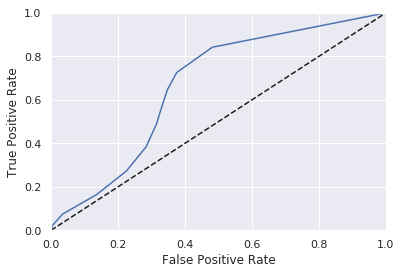

0.6643631222711879


In [123]:
analys_model(rf_clf, x=X_train, y=y_train)

## Train LGB classifier

In [124]:
from sklearn.model_selection import TimeSeriesSplit,KFold
n_fold = 4
folds = KFold(n_splits=n_fold,shuffle=True)

print(folds)

KFold(n_splits=4, random_state=None, shuffle=True)


In [125]:
X_train

array([[-1.57798669, -0.15110329,  0.82169536, ..., -0.52546723,
         0.52148805, -0.24235825],
       [-1.57798648, -1.04752683, -1.45755819, ..., -0.52546723,
         0.52148805, -0.24235825],
       [-1.57797175, -0.30793425, -1.06826307, ..., -0.52546723,
         0.52148805, -0.24235825],
       ...,
       [ 1.82767297, -0.98022795,  0.43627687, ..., -0.52546723,
         0.52148805, -0.24235825],
       [ 1.82767491,  0.41372502, -0.42290644, ..., -0.52546723,
         0.52148805, -0.24235825],
       [ 1.82768423,  1.33953464,  1.05429307, ..., -0.52546723,
         0.52148805, -0.24235825]])

In [126]:
lgb_submission=sample_submission.copy()
lgb_submission['isFraud'] = 0
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
for fold_n, (train_index, valid_index) in enumerate(folds.split(X_train)):
    print(fold_n)
    
    X_train_, X_valid = X_train[train_index], X_train[valid_index]
    y_train_, y_valid = y_train[train_index], y_train[valid_index]
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)
    
    lgbclf = lgb.LGBMClassifier(
        num_leaves= 512,
        n_estimators=512,
        max_depth=9,
        learning_rate=0.064,
        subsample=0.85,
        colsample_bytree=0.85,
        boosting_type= "gbdt",
        reg_alpha=0.3,
        reg_lamdba=0.243,
        verbosity=-1,
    )
    
    X_train_, X_valid = X_train[train_index], X_train[valid_index]
    y_train_, y_valid = y_train[train_index], y_train[valid_index]
    lgbclf.fit(X_train_,y_train_)
    
    del X_train_,y_train_
    print('finish train')
    pred=lgbclf.predict_proba(X_test)[:,1]
    val=lgbclf.predict_proba(X_valid)[:,1]
    print('finish pred')
#     del lgbclf, X_valid
    print('ROC accuracy: {}'.format(roc_auc_score(y_valid, val)))
    del val,y_valid
    lgb_submission['isFraud'] = lgb_submission['isFraud']+pred/n_fold
    del pred

0
finish train
finish pred
ROC accuracy: 0.9698324787593241
1
finish train
finish pred
ROC accuracy: 0.9684210435519547
2
finish train
finish pred
ROC accuracy: 0.9695722304241389
3
finish train
finish pred
ROC accuracy: 0.9700379429412244


In [127]:
lgb_submission.to_csv('./lgb.csv')


/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## Train XGB classifier

In [128]:
xgb_submission=sample_submission.copy()
xgb_submission['isFraud'] = 0
import xgboost as xgb
from sklearn.metrics import roc_auc_score
for fold_n, (train_index, valid_index) in enumerate(folds.split(X_train)):
    print(fold_n)
    xgbclf = xgb.XGBClassifier(
        n_estimators=512,
        max_depth=16,
        learning_rate=0.014,
        subsample=0.85,
        colsample_bytree=0.85,
        missing=-999,
        tree_method='gpu_hist',
        reg_alpha=0.3,
        reg_lamdba=0.243
    )
    
    X_train_, X_valid = X_train[train_index], X_train[valid_index]
    y_train_, y_valid = y_train[train_index], y_train[valid_index]
    xgbclf.fit(X_train_,y_train_)
    del X_train_,y_train_
    pred=xgbclf.predict_proba(X_test)[:,1]
    val=xgbclf.predict_proba(X_valid)[:,1]
    del xgbclf, X_valid
    print('ROC accuracy: {}'.format(roc_auc_score(y_valid, val)))
    del val,y_valid
    xgb_submission['isFraud'] = xgb_submission['isFraud']+pred/n_fold
    del pred
    gc.collect()

0
ROC accuracy: 0.9707603772529745
1
ROC accuracy: 0.967505470081038
2
ROC accuracy: 0.9654825622499771
3
ROC accuracy: 0.9718069852428696


In [129]:
xgb_submission.to_csv( './xgb.csv')

# Submit Predictions

In [130]:
y_final = sample_submission.copy()
y_final['isFraud'] = 0.5 * xgb_submission['isFraud'] + 0.5 * lgb_submission['isFraud']

In [131]:
y_final.to_csv('./prediction.csv')

In [132]:
y_final.head()

,isFraud
TransactionID,
3663549,0.000870
3663550,0.002315
3663551,0.002930
3663552,0.001634
3663553,0.001343
